In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.datasets as Datasets

In [2]:
#creating data set
data = Datasets.make_blobs(random_state=0)
X = np.array(data[0])

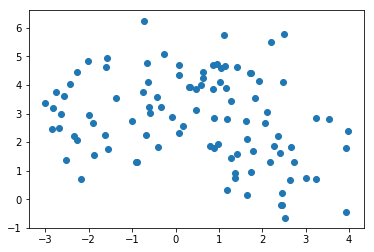

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

# Using Sklearn KMeans

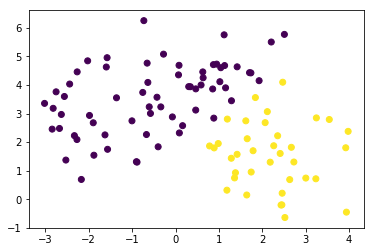

[[-0.50147954  3.56733164]
 [ 2.20523227  1.53737729]]
[1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0]


In [4]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)
Y = k_means.labels_
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()
print(k_means.cluster_centers_)
print(Y)

# My Implementation

## KMeans

In [5]:
class K_Means:
    def __init__(self, k = 2, max_iter = 1000):
        self.k = k
        self.max_iter = max_iter
    
    def fit(self, X):
        self.means = X[0:self.k,:]
        for it in range(self.max_iter):
            clusters = {}
            for i in range(0,self.k):
                clusters[i] = set()
            #Finding distance of each point from each mean point
            for i in range(0,X.shape[0]): #For each sample
                chosen_cluster = 0
                min_distance = np.inf
                for j in range(0,self.k): #From each mean point
                    dist = ((self.means[j] - X[i,:])**2).sum()
                    if(dist < min_distance):
                        min_distance = dist
                        chosen_cluster = j
                clusters[chosen_cluster].add(i) #Adding index of point to cluster of mean which is at minimum distance
        
            #Finding new means
            new_means = np.zeros(self.means.shape)
            for i in range(0,self.k):
                index_of_points_in_cluster = list(clusters[i])
                points_in_cluster = X[index_of_points_in_cluster,:]
                new_means[i] = points_in_cluster.mean(axis=0)

            #Checking if both np arrays are equal or not
            if np.absolute(new_means - self.means).sum() == 0 :
                break
            else:
                self.means = new_means
            
        self.labels = self.predict(X)
    
    def predict(self, test_data):
        cluster_pred = []
        for point in test_data:
            distances = [((point - m)**2).sum() for m in self.means]
            min_distance = min(distances)
            classification = distances.index(min_distance)
            cluster_pred.append(classification)
        return cluster_pred

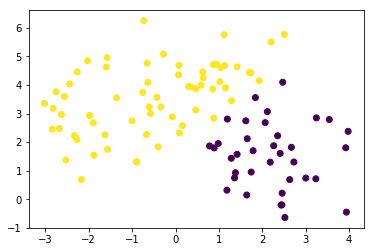

[[ 2.20523227  1.53737729]
 [-0.50147954  3.56733164]]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]


In [6]:
k_means = K_Means()
k_means.fit(X)
k_means.labels
plt.scatter(X[:,0],X[:,1],c=k_means.labels)
plt.show()
print(k_means.means)
print(k_means.labels)

## KMedoids

In [7]:
class KMedoids:
    def __init__(self,k=2,max_iter=1000):
        self.k = k
        self.max_iter=max_iter
        
    #Doesn't consider reclustering while chosing next candidate of medoid within a cluster
    def fitLocal(self,X):
        self.medoids = X[0:self.k,:]
        for it in range(self.max_iter):
            clusters = {}
            for i in range(self.k):
                clusters[i] = set()
            #Finding distance of each point from each medoid
            for i in range(X.shape[0]): #For each sample
                chosen_cluster = 0
                min_distance = np.inf
                for j in range(self.k): #From each medoid
                    dist = np.absolute(self.medoids[j]-X[i,:]).sum() #Manhattan Distance
                    if(dist < min_distance):
                        min_distance = dist
                        chosen_cluster = j
                clusters[chosen_cluster].add(i) #Adding point to cluster of mean which is at minimum distance

            #Finding new medoids
            new_medoids = np.zeros(self.medoids.shape)
            for i in range(self.k):
                index_of_points_in_cluster = list(clusters[i])
                points_in_cluster = X[index_of_points_in_cluster,:]
                #Findig point having smallest avg. distance for ith cluster
                # jth element represents avg cluster distance considering ith point in cluster as medoid
                distances = []
                for point in points_in_cluster:
                    d = 0
                    for p in points_in_cluster:
                        d += np.absolute(point-p).sum() #Manhattan Distance
                    distances.append(d)
                #One line code for above task
                #distances = [ sum([np.absolute(point-p).sum() for p in points_in_cluster]) for point in points_in_cluster]
                min_distance = min(distances)
                index = distances.index(min_distance)
                new_medoids[i] = points_in_cluster[index]
            #Checking if both np arrays are equal or not
            if np.absolute(self.medoids - new_medoids).sum() == 0 :
                break
            else:
                self.medoids = new_medoids
        self.labels = self.predict(X)
    
    #Considers reclustering to decrease system cost while chosing next candidate of medoid
    def fitGlobal(self,X):
        self.medoids = np.zeros((self.k,X.shape[-1]))
        for i in range(self.k):
            self.medoids[i] = X[i,:].copy()
        cost = np.inf #Initial Cost of system
        for it in range(self.max_iter):
            #Clustering on basis of selected medoids
            clusters = {}
            for i in range(self.k):
                clusters[i] = set()
            #Finding distance of each point from each medoid
            for i in range(X.shape[0]): #For each sample
                chosen_cluster = 0
                min_distance = np.inf
                for j in range(self.k): #From each medoid
                    dist = np.absolute(self.medoids[j]-X[i,:]).sum() #Manhattan Distance
                    if(dist < min_distance):
                        min_distance = dist
                        chosen_cluster = j
                clusters[chosen_cluster].add(i) #Adding point to cluster of mean which is at minimum distance
            
            change = False
            #For each cluster
            for i in range(self.k):
                index_of_points_in_cluster = list(clusters[i])
                points_in_cluster = X[index_of_points_in_cluster,:]
                #For each point
                for point in points_in_cluster:
                    #Considering this point as median and swapping
                    prev_medoid = np.copy(self.medoids[i])
                    self.medoids[i] = np.copy(point)
                    distances_from_medoids = [[ np.absolute(p-i).sum() for p in X] for i in self.medoids] #ith row is distance of each data point from ith medoid
                    new_cost = np.array(distances_from_medoids).min(axis=0).sum()
                    if(new_cost < cost):
                        change = True
                        cost = new_cost
                    else:
                        #undo the swap
                        self.medoids[i] = prev_medoid
            if not change:
                break
        
        self.labels = self.predict(X)
        
    def predict(self,X_test):
        Y_pred = []
        for point in X_test:
            chosen_cluster = 0
            min_distance = np.inf
            for j in range(0,len(self.medoids)): #From each medoid
                dist = np.absolute(self.medoids[j]-point).sum() #Manhattan Distance
                if(dist < min_distance):
                    min_distance = dist
                    chosen_cluster = j
            Y_pred.append(chosen_cluster)
        return Y_pred
    

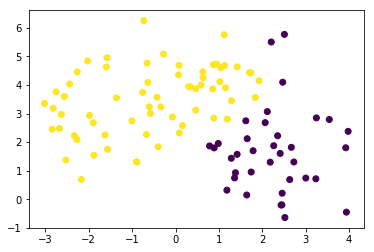

[[ 2.41163392  1.60423683]
 [-0.42724442  3.57314599]]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
k_medoids = KMedoids()
k_medoids.fitLocal(X)
plt.scatter(X[:,0],X[:,1],c=k_medoids.labels)
plt.show()
print(k_medoids.medoids)
print(k_medoids.labels)

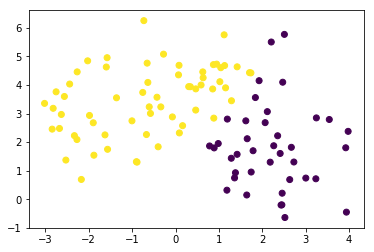

[[ 2.2635425   1.8743027 ]
 [-0.42724442  3.57314599]]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]


In [9]:
k_medoids = KMedoids()
k_medoids.fitGlobal(X)
plt.scatter(X[:,0],X[:,1],c=k_medoids.labels)
plt.show()
print(k_medoids.medoids)
print(k_medoids.labels)